# EJERCICIOS

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
from keras.activations import swish

2025-01-15 04:31:55.736074: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-15 04:31:55.743442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-15 04:31:55.752176: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-15 04:31:55.754833: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-15 04:31:55.762836: I tensorflow/core/platform/cpu_feature_guar

## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [2]:
datos = tf.keras.datasets.cifar10.load_data()

In [4]:
# Dividimos las tuplas en x e y
(x_train_full, y_train_full), (x_test_full, y_test_full) = datos

# 50,000 entrenamiento
x_train = x_train_full[:50000]
y_train = y_train_full[:50000]

# 5,000 validación
x_val = x_test_full[:5000]
y_val = y_test_full[:5000]

# 5,000 prueba
x_test = x_test_full[5000:10000]
y_test = y_test_full[5000:10000]


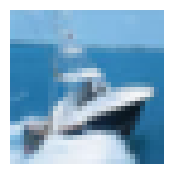

In [34]:
# muestra una imagen
plt.figure(figsize=(2, 2))
plt.imshow(x_train[8])
plt.axis('off')   # quita los ejes
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [5]:
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation=swish, kernel_initializer='he_normal'))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 
model.summary()

I0000 00:00:1736911927.235747    9086 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1736911927.265645    9086 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1736911927.265829    9086 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1736911927.268390    9086 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [6]:
historial = {}
rangos = [1e-5, 5e-4 , 1e-4 , 5e-3 , 1e-3 , 5e-2 , 1e-2]

for lr in rangos:

    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Nadam(learning_rate=lr),  
              metrics=['accuracy'])
    time_ini = time.time()
    hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
    time_fin = time.time()
    
    historial[lr] = {'Tasa aprendizaje': lr, 'Entrenamiento accuracy': hist.history['accuracy'][-1], 
                     'Validacion accuracy': hist.history['val_accuracy'][-1], 'Tiempo': time_fin-time_ini}

Epoch 1/10


I0000 00:00:1736911936.875276    9187 service.cc:146] XLA service 0x7fe6f4026800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736911936.875337    9187 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-01-15 04:32:17.016147: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-15 04:32:17.239593: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


 104/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1016 - loss: 80.5041

I0000 00:00:1736911938.012938    9187 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.1142 - loss: 20.0085 - val_accuracy: 0.1666 - val_loss: 2.7409
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1650 - loss: 2.5454 - val_accuracy: 0.2082 - val_loss: 2.2498
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2117 - loss: 2.2013 - val_accuracy: 0.2612 - val_loss: 2.0718
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2479 - loss: 2.0805 - val_accuracy: 0.2662 - val_loss: 2.0142
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2661 - loss: 2.0030 - val_accuracy: 0.2806 - val_loss: 1.9541
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2920 - loss: 1.9366 - val_accuracy: 0.3134 - val_loss: 1.8942
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3051 - loss: 1.8982 - val_accuracy: 0.3226 - val_loss: 1.8552
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3229 - loss: 1.8558 - val_accura

In [7]:
mejor_lr = 0
mejor_val_acc = -2
for k,value in historial.items(): 
    txt = ''
    for key in value.keys(): txt += str(key)+': '+str(value[key])+'    '
    print(txt)
    if mejor_val_acc < value['Validacion accuracy']:
        mejor_val_acc = value['Validacion accuracy']
        mejor_lr = k
print('Mejor lr: ',mejor_lr)

Tasa aprendizaje: 1e-05    Entrenamiento accuracy: 0.34845998883247375    Validacion accuracy: 0.35839998722076416    Tiempo: 27.992127895355225    
Tasa aprendizaje: 0.0005    Entrenamiento accuracy: 0.4192200005054474    Validacion accuracy: 0.4374000132083893    Tiempo: 29.62821388244629    
Tasa aprendizaje: 0.0001    Entrenamiento accuracy: 0.4935399889945984    Validacion accuracy: 0.4593999981880188    Tiempo: 28.677001953125    
Tasa aprendizaje: 0.005    Entrenamiento accuracy: 0.09907999634742737    Validacion accuracy: 0.10140000283718109    Tiempo: 27.947672367095947    
Tasa aprendizaje: 0.001    Entrenamiento accuracy: 0.0983399972319603    Validacion accuracy: 0.09759999811649323    Tiempo: 57608.54164338112    
Tasa aprendizaje: 0.05    Entrenamiento accuracy: 0.09976000338792801    Validacion accuracy: 0.10080000013113022    Tiempo: 30.36816120147705    
Tasa aprendizaje: 0.01    Entrenamiento accuracy: 0.09989999979734421    Validacion accuracy: 0.0989999994635582    

### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_6_D_checkpoints.weights.h5", save_weights_only=True)

hist = model.fit(x_train, y_train, epochs=70, validation_data=(x_val, y_val), 
                     callbacks=[checkpoint_cb,early_stopping_cb])


model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
            optimizer=tf.keras.optimizers.Nadam(learning_rate=mejor_lr),   # asignar tasa de aprendizaje
            metrics=['accuracy'])
time_ini = time.time()
hist = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val))
time_fin = time.time()

historial[mejor_lr] = ({'Tasa aprendizaje': mejor_lr, 'Entrenamiento accuracy': hist.history['accuracy'][-1], 
                    'Validacion accuracy': hist.history['val_accuracy'][-1], 'Tiempo': time_fin-time_ini})

### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [50]:
# crear red
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
model.add(tf.keras.layers.Normalization(input_shape=(32,32,3)))
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation=swish, kernel_initializer='he_normal'))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 

# entrenar
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
            optimizer=tf.keras.optimizers.Nadam(learning_rate=lr),  
            metrics=['accuracy'])
time_ini = time.time()
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
time_fin = time.time()

historial[lr] = {'Tasa aprendizaje': lr, 'Entrenamiento accuracy': hist.history['accuracy'][-1], 
                    'Validacion accuracy': hist.history['val_accuracy'][-1], 'Tiempo': time_fin-time_ini,
                    'Mejor epoca':0}

/home/iabd/anaconda3/envs/iabd_3_9/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.